In [530]:
#mount gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [531]:
#read csv file into a dataframe
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/ML_assignments/banking.csv')

df.head(10)
#df.dtypes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [532]:
#find number of missing values in each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No missing values in the dataset.

**Can remove "duration" feature, since this is a realistic system. (as per the instructions)**

In [533]:
# dropping "duration"
df = df.drop(columns=['duration'])

In [534]:
# checking data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [535]:
df.shape

(41188, 20)

**<h1>Drawing Box-Plots</h1>**

Box-Plots for non-categorical features.

**"age" Box Plot**

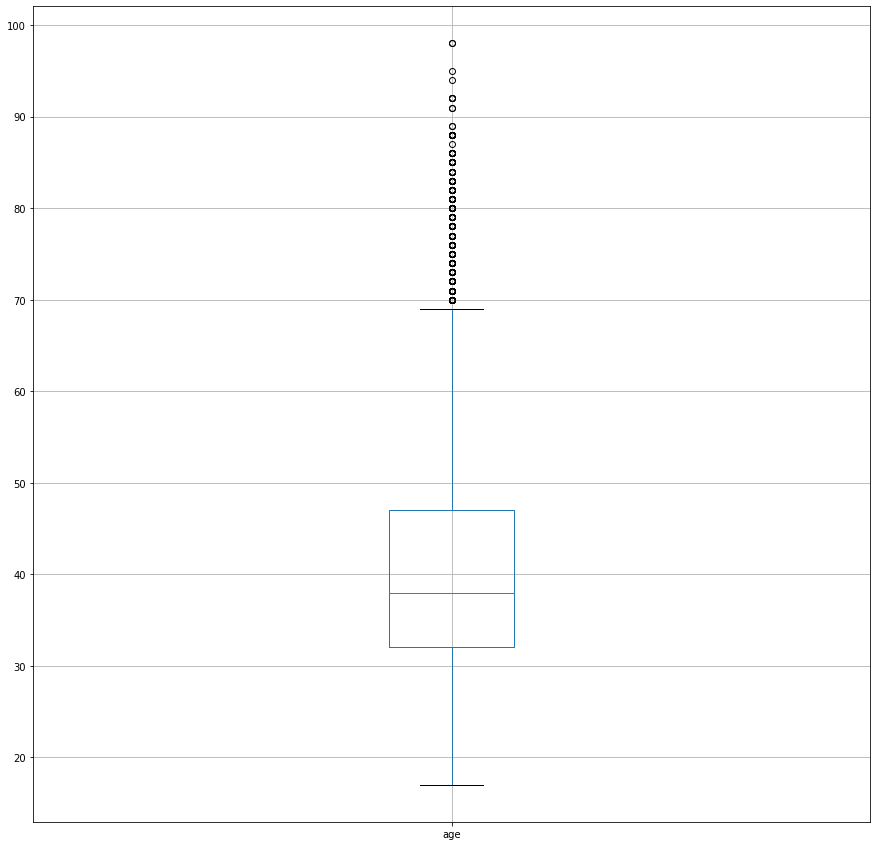

In [536]:
df.boxplot(column=['age'], figsize=[15,15])

'age' feature does not have outliers,since there are many points far away from the maximum(not just 1 or 2 points).



**"campaign" Box Plot**

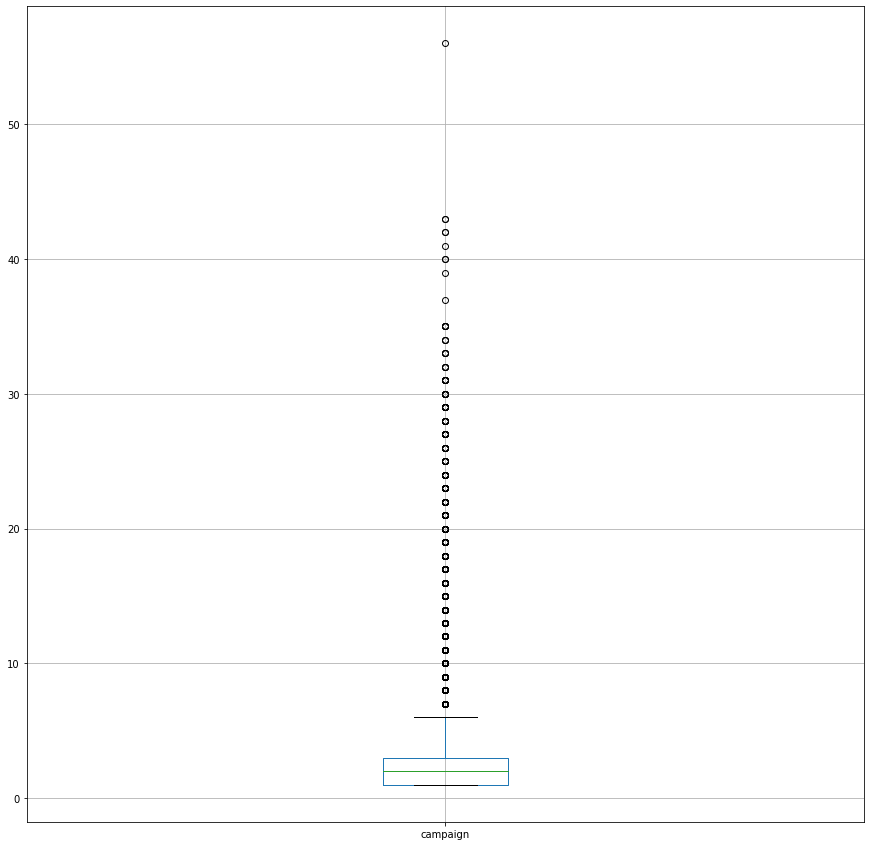

In [537]:
df.boxplot(column=['campaign'], figsize=[15,15])

'campaign' feature does not have outliers,since there are many points far away from the maximum(not just 1 or 2 points).



**"pdays" Box Plot**

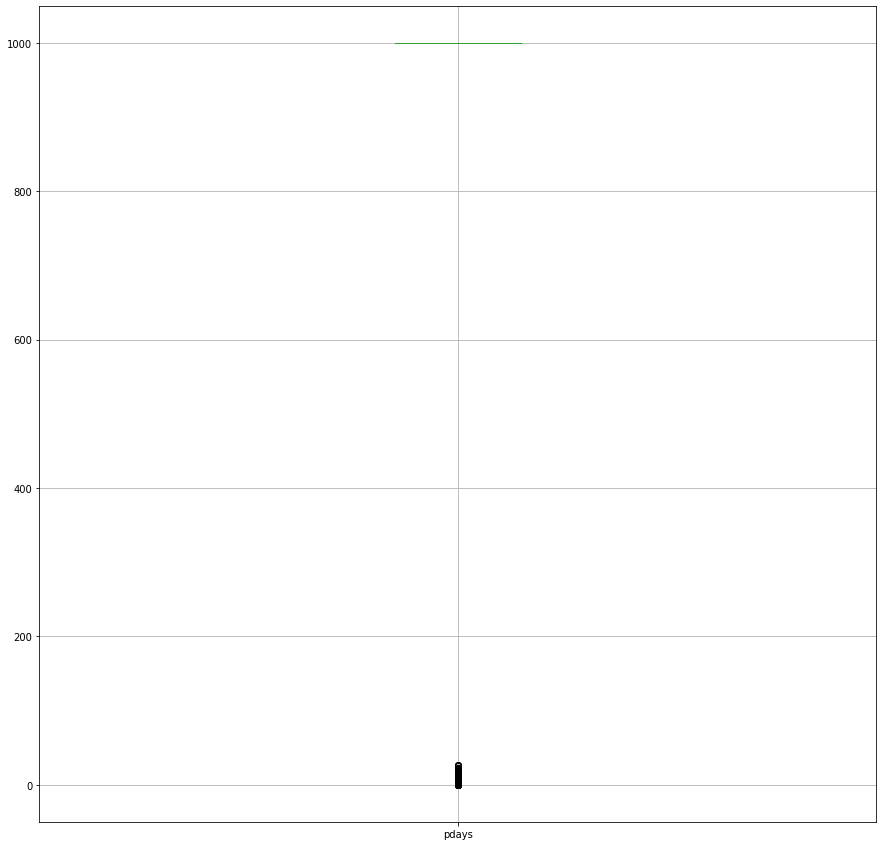

In [538]:
df.boxplot(column=['pdays'], figsize=[15,15])

'pdays' feature does not have outliers,since there are many points below the minimum(not just 1 or 2 points).



**"previous" Box Plot**

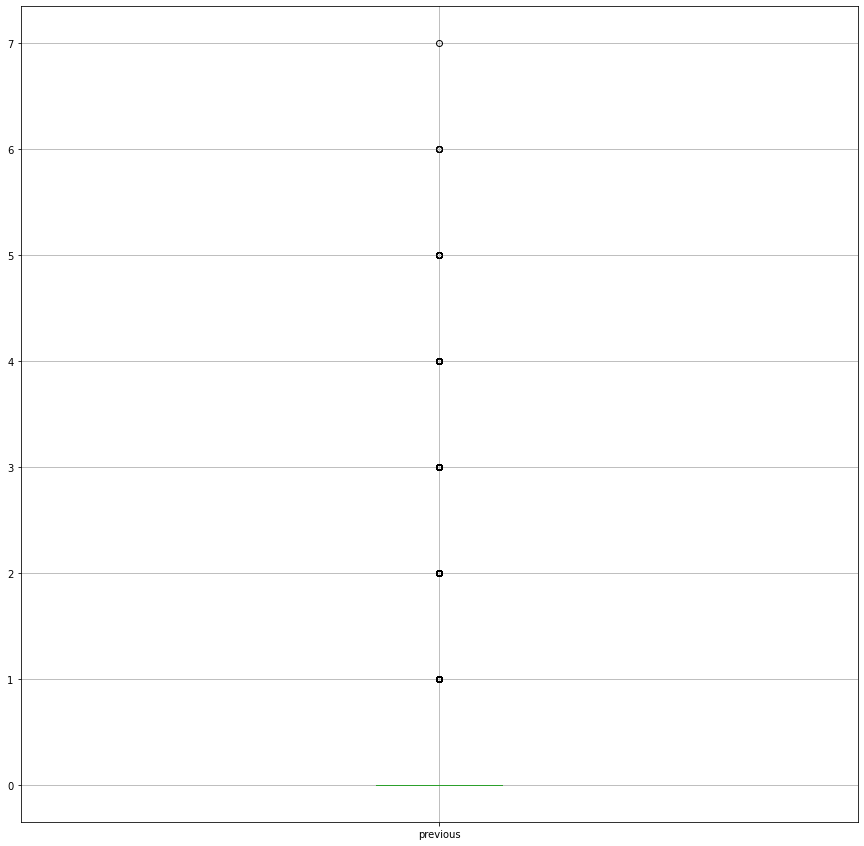

In [539]:
df.boxplot(column=['previous'], figsize=[15,15])

'previous' feature does not have outliers,since there are many points far away from the maximum(not just 1 or 2 points).



**"emp_var_rate" Box Plot**

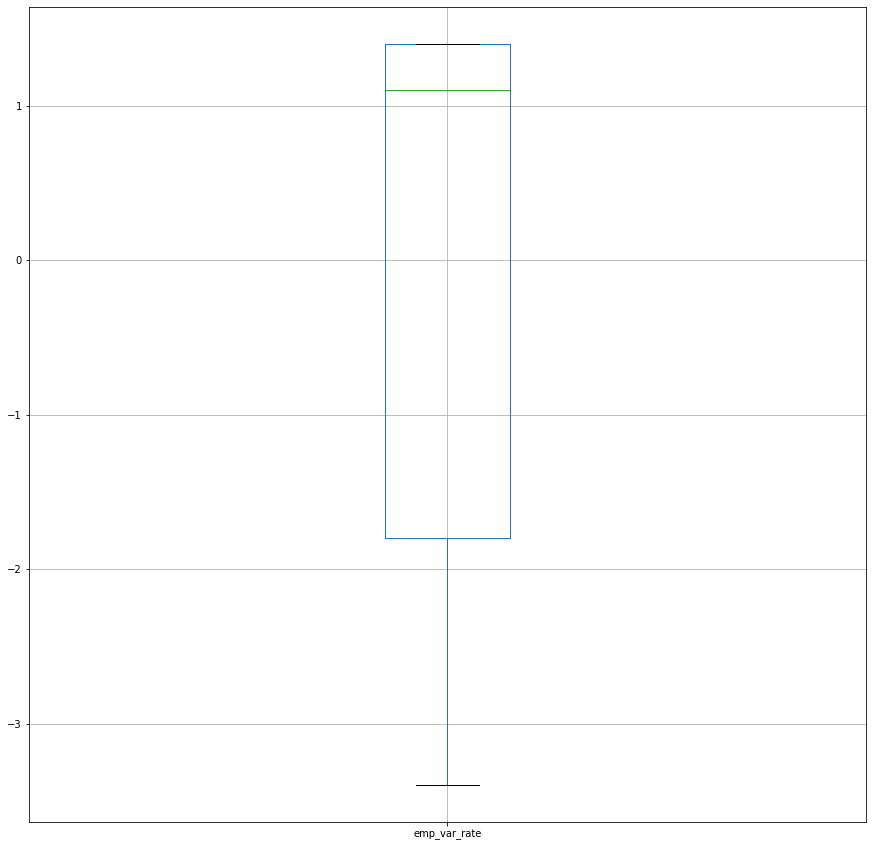

In [540]:
df.boxplot(column=['emp_var_rate'], figsize=[15,15])

'emp_var_rate' feature does not have outliers. All the point are within the min-max range.



**"cons_price_idx" Box Plot**

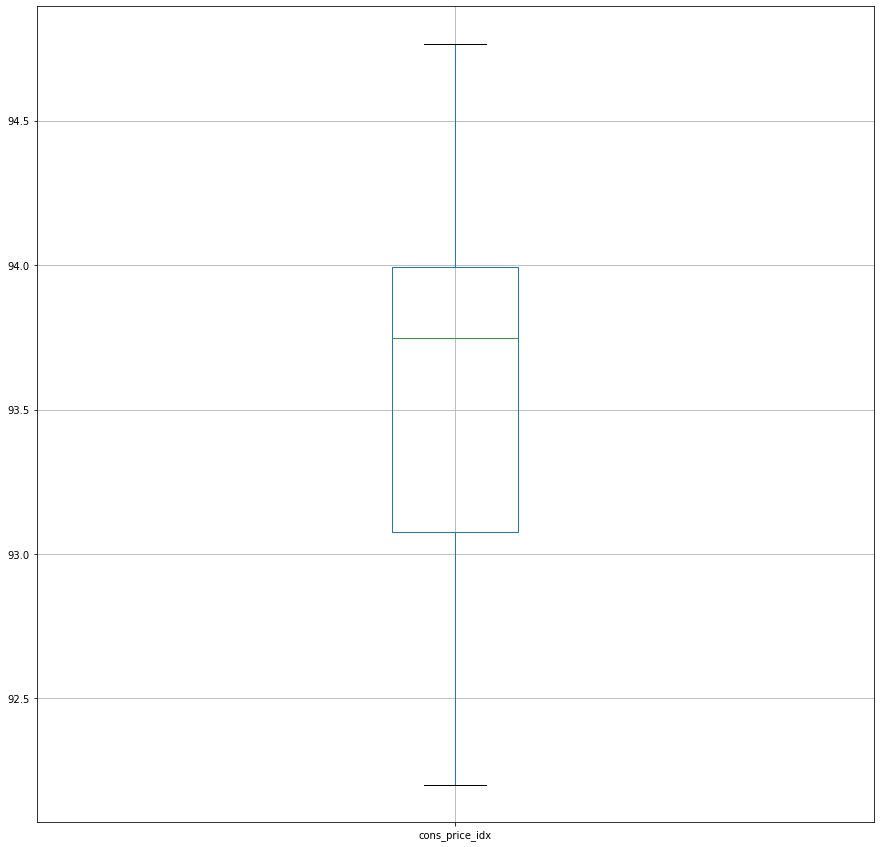

In [541]:
df.boxplot(column=['cons_price_idx'], figsize=[15,15])

'cons_price_idx' feature does not have outliers. All the points are within the min-max range.



**"cons_conf_idx" Box Plot**

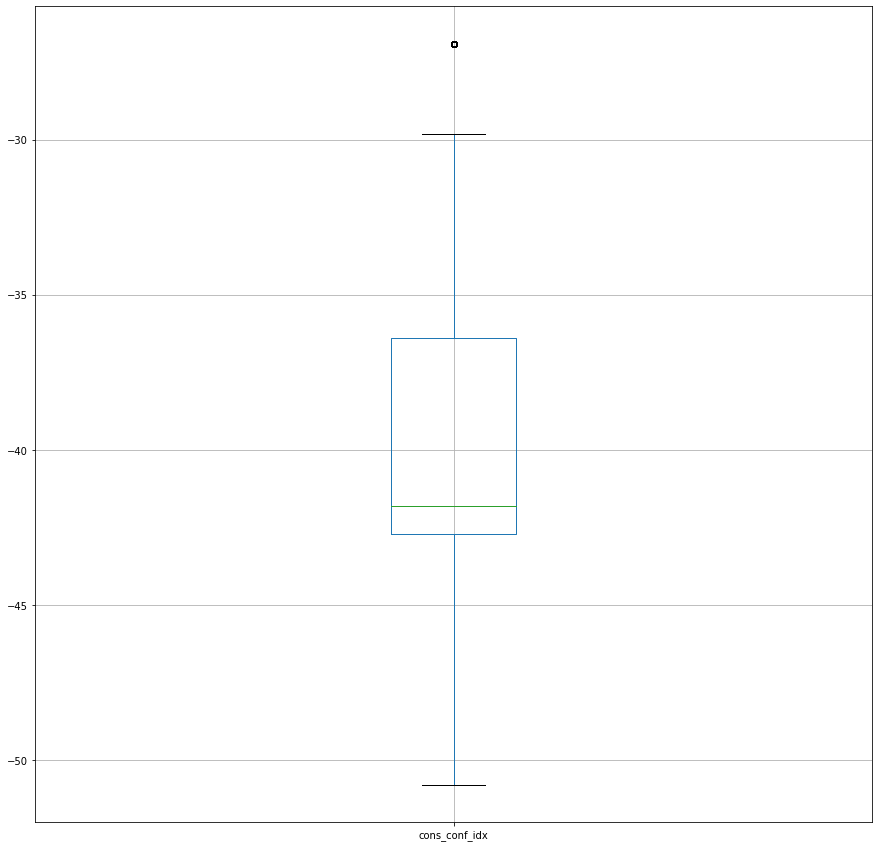

In [542]:
df.boxplot(column=['cons_conf_idx'], figsize=[15,15])

'cons_conf_idx' feature has an outlier,since there is a point far away from the maximum.



**"euribor3m" Box Plot**

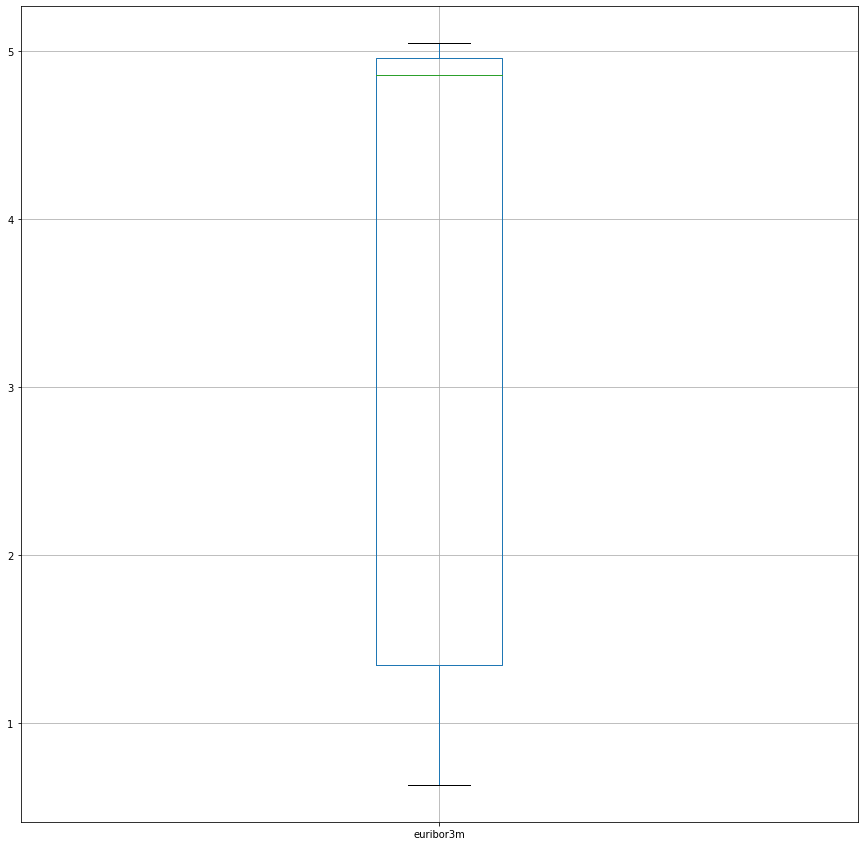

In [543]:
df.boxplot(column=['euribor3m'], figsize=[15,15])

'euribor3m' feature does not have outliers. All the points are within the min-max range.



**"nr_employed" Box Plot**

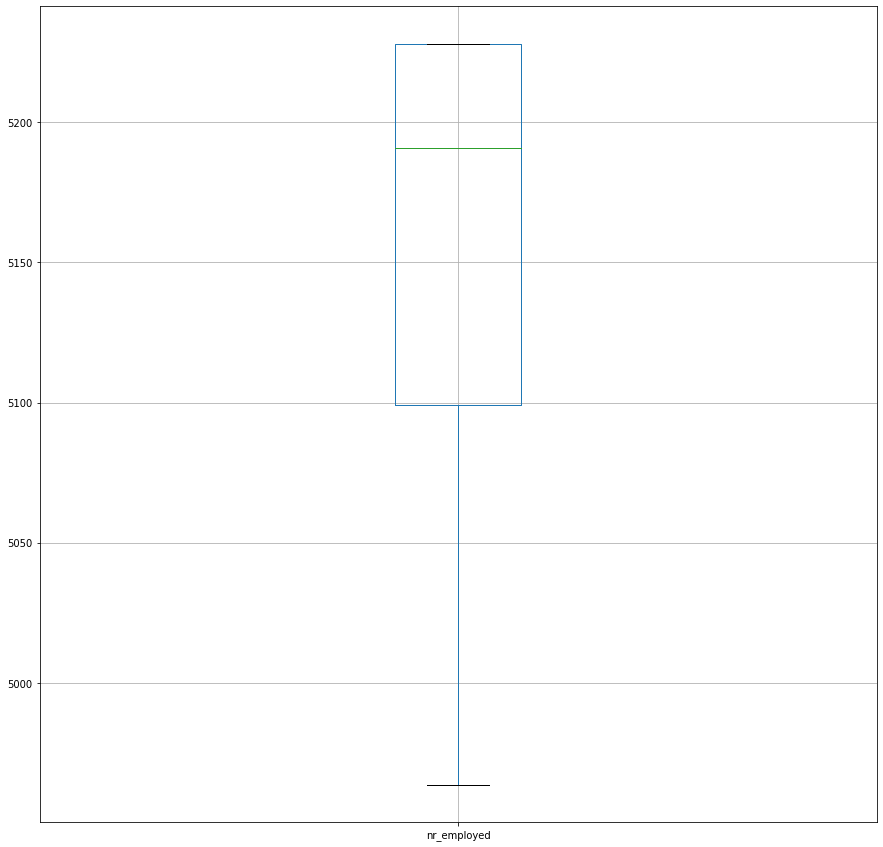

In [544]:
df.boxplot(column=['nr_employed'], figsize=[15,15])

'nr_employed' feature does not have outliers. All the points are within the min-max range.



Remove the outlier in "cons_conf_idx".

In [545]:
# Minimum Percentile Value
min_val = df.cons_conf_idx.quantile(0.05)
# Maximum Percentile Value
max_val = df.cons_conf_idx.quantile(0.95)
# Removing all the outliers
df = df[(df['cons_conf_idx']>min_val) & (df['cons_conf_idx']<max_val)]

In [546]:
df.shape

(35925, 20)

**<h1>Drawing Q-Q Plots and Histograms</h1>**



For non-categorical features.

In [547]:
import matplotlib.pyplot as plt
import scipy.stats as stats

**Q-Q Plot and Histogram for "age"**

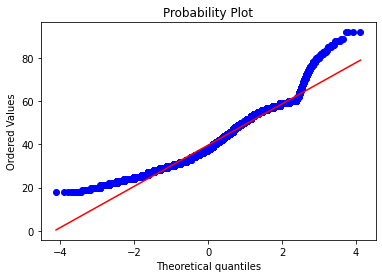

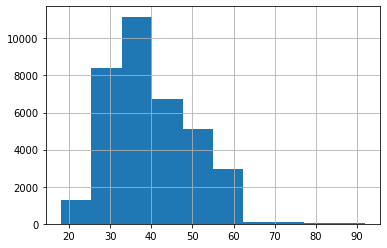

In [548]:
# Q-Q Plot drawing
stats.probplot(df['age'],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['age'].hist()

Right-skewed. Need transformation.

**Q-Q Plot and Histogram for "campaign"**

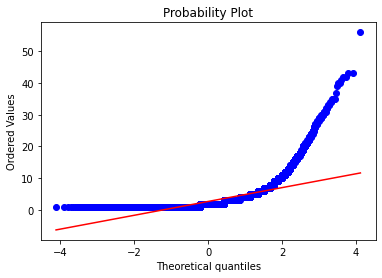

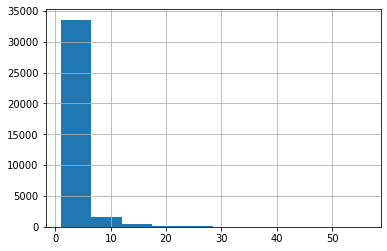

In [549]:
# Q-Q Plot drawing
stats.probplot(df["campaign"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['campaign'].hist()

Right-skewed. Need transformation.

**Q-Q Plot and Histogram for "pdays"**

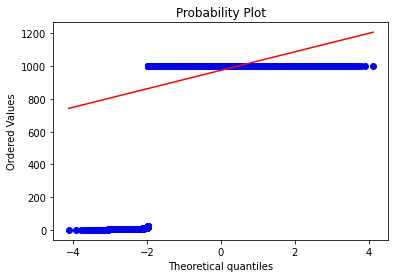

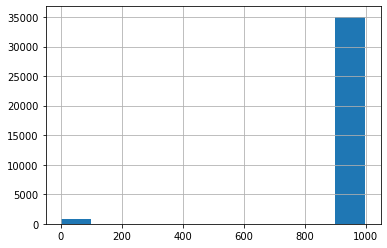

In [550]:
# Q-Q Plot drawing
stats.probplot(df["pdays"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['pdays'].hist()

Left-skewed. Need transformation.

**Q-Q Plot and Histogram for "previous"**

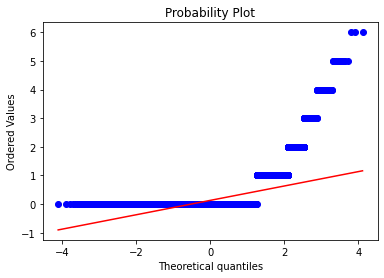

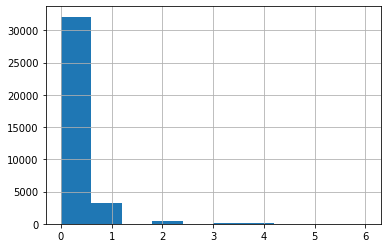

In [551]:
# Q-Q Plot drawing
stats.probplot(df["previous"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['previous'].hist()

Right-skewed. Need transformation.

In [552]:
import matplotlib.pyplot as plt
import scipy.stats as stats

**Q-Q Plot and Histogram for "emp_var_rate"**

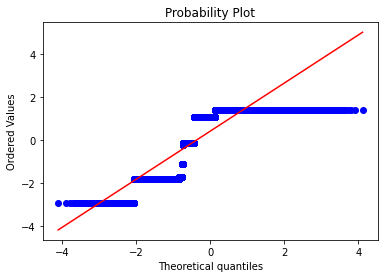

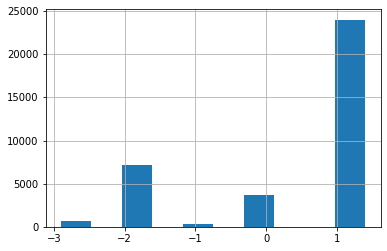

In [553]:
# Q-Q Plot drawing
stats.probplot(df["emp_var_rate"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['emp_var_rate'].hist()

No long tail end. No transformation is needed.

**Q-Q Plot and Histogram for "cons_price_idx"**

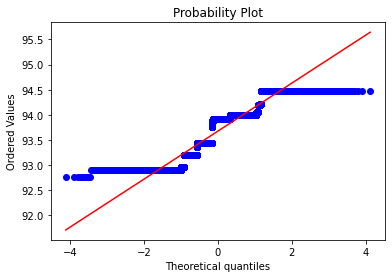

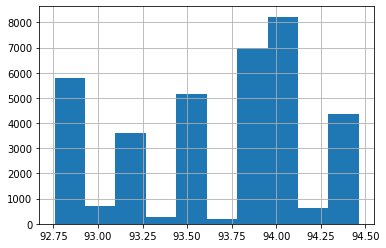

In [554]:
# Q-Q Plot drawing
stats.probplot(df["cons_price_idx"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['cons_price_idx'].hist()

No long tail end. No need of transformation.

**Q-Q Plot and Histogram for "cons_conf_idx"**

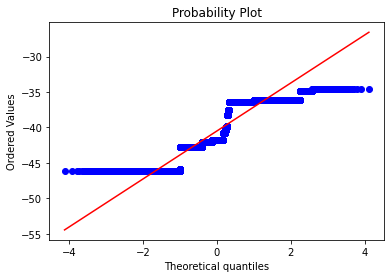

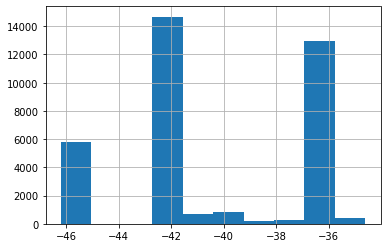

In [555]:
# Q-Q Plot drawing
stats.probplot(df["cons_conf_idx"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['cons_conf_idx'].hist()

No long tail end. No need of transformation.

**Q-Q Plot and Histogram for "euribor3m"**

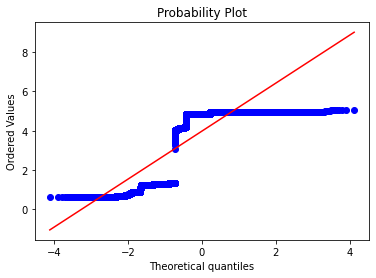

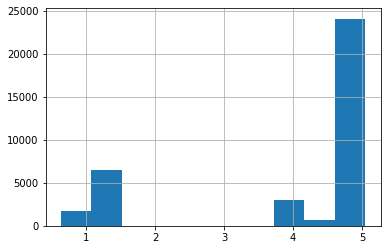

In [556]:
# Q-Q Plot drawing
stats.probplot(df["euribor3m"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['euribor3m'].hist()

No long tail end. No need of transformation.

**Q-Q Plot and Histogram for "nr_employed"**

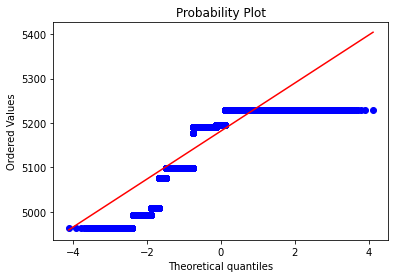

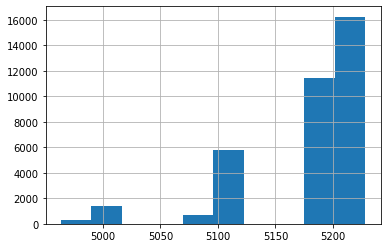

In [557]:
# Q-Q Plot drawing
stats.probplot(df["nr_employed"],dist='norm',plot=plt)
plt.show()
# histogram drawing
df['nr_employed'].hist()

No long tail end. No need of transformation.

In [558]:
df.shape

(35925, 20)

**Transformation for "age","previous" and "campaign"**

In [559]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

In [560]:
df.shape

(35925, 20)

In [561]:
# sqrt transformation
column = ['age','previous','campaign']
sq = FunctionTransformer(np.sqrt, validate=True)
data_new = sq.transform(df[column])

In [562]:
# re-assigning transformed values 
df['age'] = data_new[:,0]
df['previous'] = data_new[:,1]
df['campaign'] = data_new[:,2]

**Transformation for "pdays"**

In [563]:
# square transformation
column = ['pdays']
sqr = FunctionTransformer(np.square, validate=True)
data_new = sqr.transform(df[column])

In [564]:
# re-assigning transformed values 
df['pdays'] = data_new[:,0]

**<h1>Data Coding</h1>**

In [565]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [566]:
import numpy as np

In [567]:
# categories display
names = df.job.unique()
names = np.sort(names)
print(names)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [568]:
# categories display 
names = df.marital.unique()
names = np.sort(names)
print(names)

['divorced' 'married' 'single' 'unknown']


In [569]:
# categories display 
names = df.education.unique()
names = np.sort(names)
print(names)

['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


In [570]:
# categories display 
names = df.default.unique()
names = np.sort(names)
print(names)

['no' 'unknown' 'yes']


In [571]:
# categories display 
names = df.housing.unique()
names = np.sort(names)
print(names)

['no' 'unknown' 'yes']


In [572]:
# categories display 
names = df.loan.unique()
names = np.sort(names)
print(names)

['no' 'unknown' 'yes']


In [573]:
# categories display 
names = df.contact.unique()
names = np.sort(names)
print(names)

['cellular' 'telephone']


In [574]:
# categories display
names = df.month.unique()
names = np.sort(names)
print(names)

['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


In [575]:
# categories display 
names = df.day_of_week.unique()
names = np.sort(names)
print(names)

['fri' 'mon' 'thu' 'tue' 'wed']


In [576]:
# categories display
names = df.poutcome.unique()
names = np.sort(names)
print(names)

['failure' 'nonexistent' 'success']


Will apply lable encoding, since one-hot encoding will make the dataframe very lengthy.

**Data coding for "job"**

In [577]:
# label encoding
df['job'] = df['job'].astype('category')
df['job'] = df['job'].cat.codes


In [578]:
df.shape

(35925, 20)

In [579]:
df.dtypes

age               float64
job                  int8
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [580]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,6.633250,1,married,basic.4y,unknown,yes,no,cellular,aug,thu,1.000000,998001,0.000000,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,7.280110,9,married,unknown,no,no,no,cellular,nov,fri,1.000000,998001,0.000000,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,5.291503,4,single,university.degree,no,yes,no,cellular,jun,thu,1.732051,36,1.414214,success,-1.7,94.055,-39.8,0.729,4991.6,1
5,5.477226,4,divorced,basic.4y,no,yes,no,cellular,jul,tue,2.828427,998001,0.000000,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,6.082763,1,married,basic.4y,no,yes,no,cellular,may,thu,1.000000,998001,0.000000,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,6.244998,1,divorced,basic.9y,no,yes,no,cellular,may,fri,1.000000,998001,0.000000,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,6.000000,0,married,university.degree,no,no,no,cellular,jun,mon,1.000000,9,1.000000,success,-2.9,92.963,-40.8,1.266,5076.2,1
10,5.830952,3,single,university.degree,no,no,no,telephone,may,fri,1.414214,998001,0.000000,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
11,6.403124,4,married,university.degree,no,yes,no,cellular,aug,thu,1.000000,998001,0.000000,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
12,7.416198,4,married,university.degree,no,no,no,cellular,aug,mon,1.732051,998001,0.000000,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1


**Data coding for "marital"**

In [581]:
# label encoding
df['marital'] = df['marital'].astype('category')
df['marital'] = df['marital'].cat.codes



In [582]:
df.dtypes

age               float64
job                  int8
marital              int8
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

**Data coding for "education"**

In [583]:
# label encoding
df['education'] = df['education'].astype('category')
df['education'] = df['education'].cat.codes

**Data coding for "default"**

In [584]:
# label encoding
df['default'] = df['default'].astype('category')
df['default'] = df['default'].cat.codes


In [585]:
df.dtypes

age               float64
job                  int8
marital              int8
education            int8
default              int8
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

**Data coding for "housing"**

In [586]:
# label encoding
df['housing'] = df['housing'].astype('category')
df['housing'] = df['housing'].cat.codes



**Data coding for "loan"**

In [587]:
# label encoding
df['loan'] = df['loan'].astype('category')
df['loan'] = df['loan'].cat.codes



**Data coding for "contact"**

In [588]:
# label encoding
df['contact'] = df['contact'].astype('category')
df['contact'] = df['contact'].cat.codes



**Data coding for "month"**

In [589]:
# label encoding
df['month'] = df['month'].astype('category')
df['month'] = df['month'].cat.codes

**Data coding for "day_of_week"**

In [590]:
# label encoding
df['day_of_week'] = df['day_of_week'].astype('category')
df['day_of_week'] = df['day_of_week'].cat.codes

**Data coding for "poutcome"**

In [591]:
# label encoding
df['poutcome'] = df['poutcome'].astype('category')
df['poutcome'] = df['poutcome'].cat.codes



In [592]:
df.dtypes

age               float64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
campaign          float64
pdays               int64
previous          float64
poutcome             int8
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [593]:
df.shape

(35925, 20)

In [594]:
# checking missing values,to ensure no error occured
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

**<h1>Scaling Features</h1>**

For non-categorical features.

In [595]:
# separating target
column = ['y']
y = pd.DataFrame(df[column], columns=['y'])

#y.head()

In [596]:
# separating non-categorical features
column = ['age','campaign','previous','pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
numerical = pd.DataFrame(df[column], columns = column)
#numerical.dtypes

In [597]:
# separating categorical features
categorical = df.drop(columns=['age','campaign','previous','pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y'])

**Before scaling**

In [598]:
column = ['age','campaign','previous','pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff22cd351d0>,
      dtype=object)

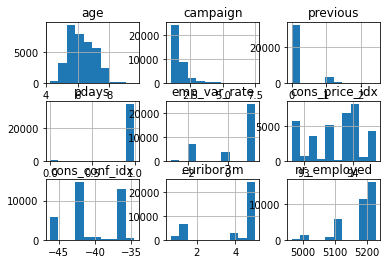

In [599]:
# histogram drawing
numerical[column].hist()

In [600]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# creating scaler object
scaler = StandardScaler()

# scaler fitting on data
scaler.fit(numerical)

# transformation
d_new = scaler.transform(numerical)

# re-assigning transformed values
numerical['age'] = d_new[:,0]
numerical['campaign'] = d_new[:,1]
numerical['previous'] = d_new[:,2]
numerical['pdays'] = d_new[:,3]
numerical['emp_var_rate'] = d_new[:,4]
numerical['cons_price_idx'] = d_new[:,5]
numerical['cons_conf_idx'] = d_new[:,6]
numerical['euribor3m'] = d_new[:,7]
numerical['nr_employed'] = d_new[:,8]

# joining separated dataframes
df = numerical.join(categorical)
df = df.join(y)
df.dtypes

age               float64
campaign          float64
previous          float64
pdays             float64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
poutcome             int8
y                   int64
dtype: object

In [601]:
# checking missing values,to ensure no error occured
df.isnull().sum()

age               0
campaign          0
previous          0
pdays             0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

In [602]:
df.shape

(35925, 20)

**After scaling**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff22fa4ca50>,
      dtype=object)

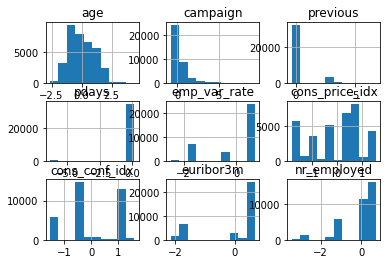

In [603]:
# histogram drawing
df[column].hist()

**No descritization is applied, since the distribution of values is not within a huge range.**

In [604]:
import seaborn as sns

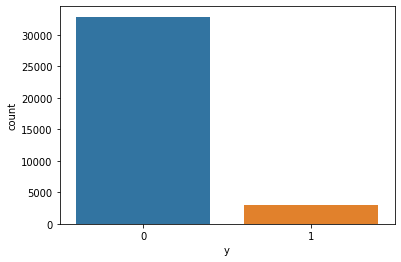

In [605]:
#checking class imbalance
sns.countplot(x='y', data=df)
plt.show()

There is a class imbalance.

In [606]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
column = ['y']
y = pd.DataFrame(df[column],columns=column)
x = df.drop(columns=['y'])
y_array = np.ravel(y)
smot_x, smot_y = os.fit_sample(x, y_array)

smoted_x = pd.DataFrame(smot_x,columns=x.columns)
smoted_y= pd.DataFrame(smot_y,columns=['y'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [607]:
df = smoted_x.join(smoted_y)

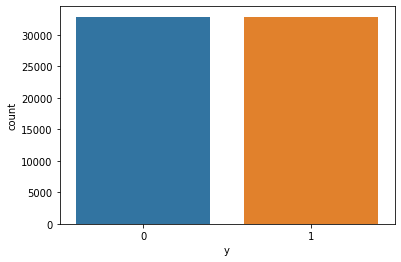

In [608]:
#checking if balanced
sns.countplot(x='y', data=df)
plt.show()

**<h1>Feature reduction</h1>**

**<h2>Heat map</h2>**

In [609]:
print(df.corrwith(df["y"]))

age              -0.017525
campaign         -0.118974
previous          0.259367
pdays            -0.294969
emp_var_rate     -0.360054
cons_price_idx   -0.064914
cons_conf_idx    -0.008268
euribor3m        -0.383335
nr_employed      -0.408696
job               0.025714
marital           0.080289
education         0.079525
default          -0.158356
housing           0.015999
loan             -0.040285
contact          -0.228548
month            -0.008748
day_of_week       0.017698
poutcome          0.169027
y                 1.000000
dtype: float64


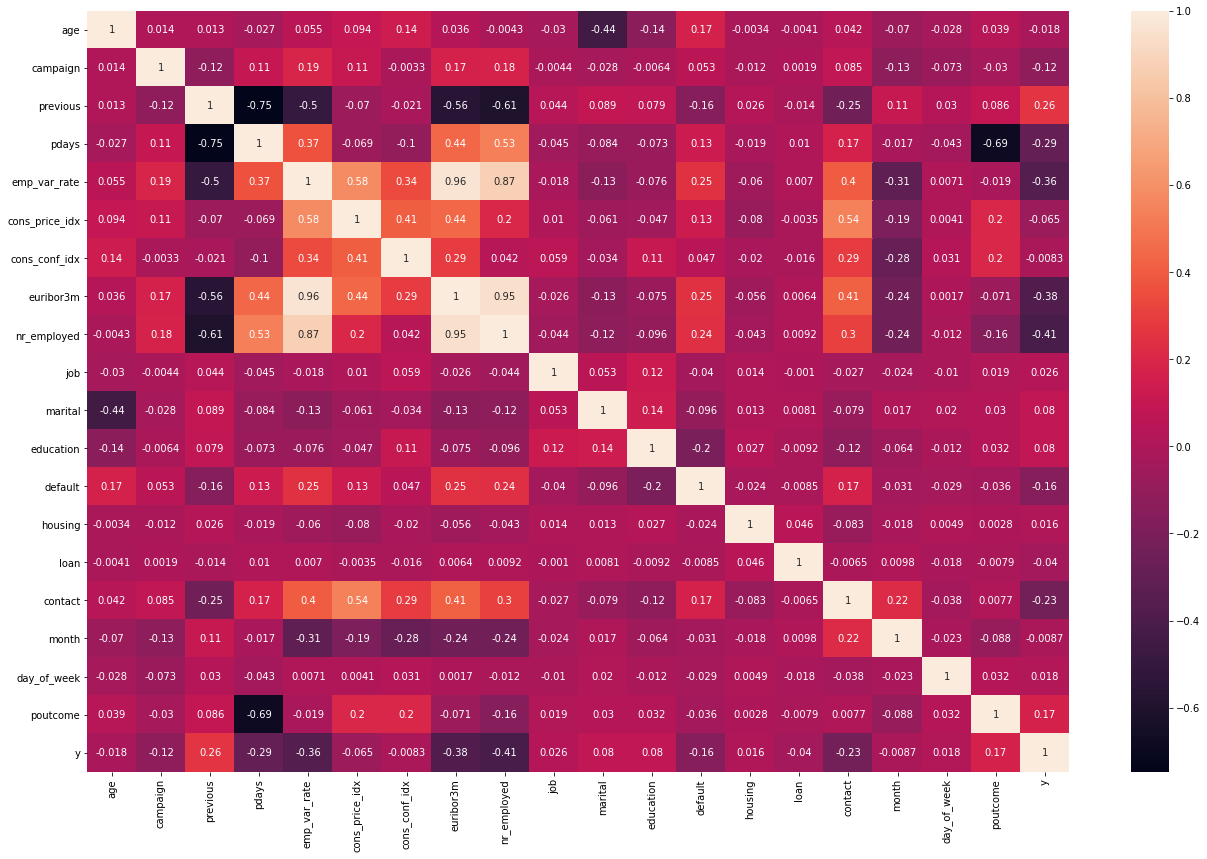

In [610]:
import matplotlib.pyplot as plt
import seaborn as sns

# drawing heat map 
plt.figure(figsize=(22,14))
sns.heatmap(df.corr(),annot=True)

In [611]:
print(df.corr())

                     age  campaign  previous  ...  day_of_week  poutcome         y
age             1.000000  0.013551  0.012531  ...    -0.027586  0.039029 -0.017525
campaign        0.013551  1.000000 -0.117541  ...    -0.072891 -0.029988 -0.118974
previous        0.012531 -0.117541  1.000000  ...     0.029544  0.086173  0.259367
pdays          -0.027312  0.105586 -0.746981  ...    -0.042521 -0.688214 -0.294969
emp_var_rate    0.055450  0.193414 -0.495538  ...     0.007066 -0.019109 -0.360054
cons_price_idx  0.094260  0.109118 -0.069874  ...     0.004094  0.201301 -0.064914
cons_conf_idx   0.140151 -0.003308 -0.021058  ...     0.030917  0.196178 -0.008268
euribor3m       0.035535  0.172644 -0.559502  ...     0.001686 -0.071153 -0.383335
nr_employed    -0.004320  0.179903 -0.606372  ...    -0.012105 -0.159012 -0.408696
job            -0.029551 -0.004438  0.044404  ...    -0.010191  0.019491  0.025714
marital        -0.443654 -0.027662  0.089013  ...     0.019819  0.029746  0.080289
educ

"euribor3m", "emp_var_rate" and "nr_employed" are highly positive correlated. Can remove 2 of them. 

In [612]:
df = df.drop(columns=['euribor3m','nr_employed'])

In [613]:
df.shape

(65752, 18)

In [614]:
df.head()

,age,campaign,previous,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.495230,-0.790736,-0.336366,0.157538,0.724126,-0.460691,1.198185,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0
1,1.345441,-0.790736,-0.336366,0.157538,-0.399809,-0.943076,-0.406188,9.0,1.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0
2,-1.268315,0.358861,3.775247,-6.347820,-1.598674,0.747250,0.192052,4.0,2.0,6.0,0.0,2.0,0.0,0.0,4.0,2.0,2.0,1
3,-1.024207,2.080586,-0.336366,0.157538,0.724126,0.476402,-0.596538,4.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0,0
4,-0.228310,-0.790736,-0.336366,0.157538,-1.673603,-1.550012,-1.548284,1.0,1.0,0.0,0.0,2.0,0.0,0.0,6.0,2.0,1.0,0


In [615]:
column = ['y']
target = pd.DataFrame(df[column], columns=['y'])
features = df.drop(columns=['y'])

**<h2>SVD</h2>**

In [616]:
from sklearn.decomposition import TruncatedSVD

In [617]:
# creating svd object 
svd = TruncatedSVD(n_components=16)

# converting feature set to np array
df_arr = features.to_numpy()

# fitting and transformation
X_transformed = svd.fit_transform(df_arr)


# creating transformed feature dataframe
v = pd.DataFrame(X_transformed)

v.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.105559,-0.110974,-0.597538,0.254358,-2.174485,-0.536493,0.601473,-1.589328,-1.176005,-0.173374,0.534193,-0.134715,-0.276352,-1.039294,0.641658,-0.274583
1,12.711364,2.098713,-1.152702,-0.217594,3.054629,1.498119,1.472718,1.439146,-0.358991,-0.837760,-0.389706,-0.282715,-0.464564,-0.422701,-0.343281,-0.170223
2,9.419049,-1.330988,6.896146,-1.075734,-0.117739,0.546211,-1.430446,-1.075703,0.626963,0.174342,-0.041458,-0.370646,0.335412,0.088014,0.015543,-0.164517
3,4.965716,1.302095,-1.247649,1.724832,-2.216117,-0.756738,-0.987568,-1.454879,2.051588,0.268223,0.219109,-0.538546,-0.697977,0.840830,-0.168813,-0.364670
4,5.027737,-2.854274,-1.141429,3.853557,0.341099,-1.790556,0.217603,-1.221236,-0.371096,-0.767632,-0.178481,-0.372539,0.128424,0.014048,-0.112778,0.034842
5,5.371197,-2.976373,-0.971033,2.443038,2.344404,-0.450692,0.765776,-1.208871,-0.385829,-0.839337,-0.439744,-0.498389,-0.385424,0.614296,0.065776,-0.007490
6,6.535696,-4.369403,6.633344,-1.139379,1.572326,0.038256,-0.170366,0.739225,-0.268642,-1.777431,0.384867,-0.222998,-0.334620,0.013331,0.294918,0.303983
7,8.396966,-1.975210,-1.217082,-1.327392,1.346081,2.681496,-0.960603,0.770846,-0.566688,-0.005224,0.570272,-0.124024,0.308802,-0.557794,-0.201769,0.264681
8,6.741926,0.886113,-0.256528,-4.030553,-0.401848,-0.340393,0.660804,-0.890433,-1.094879,-0.096105,0.143919,-0.317426,-0.621042,-0.400391,-0.145174,0.041121
9,6.209706,1.198770,-0.240851,-3.940831,0.286579,0.736173,1.488606,0.831808,0.150333,-0.421166,0.678008,-0.025977,-0.264989,-0.905067,-0.251602,0.037690


In [618]:
from sklearn.model_selection import train_test_split

# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(v, target, test_size=0.25)

In [ ]:
# training SVM with linear kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
y_tr = np.ravel(y_train)
clf = SVC(C=1,kernel='linear',cache_size=3000)
clf.fit(X_train,y_tr)
prediction = clf.predict(X_test)

In [620]:
print(accuracy_score(y_test,prediction))

0.6875532303199903


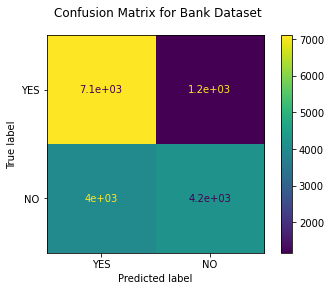

In [621]:
# drawing confusion matrix for the prediction
from sklearn.metrics import plot_confusion_matrix
fig1=plot_confusion_matrix(clf, X_test, y_test,display_labels=["YES","NO"])
fig1.figure_.suptitle("Confusion Matrix for Bank Dataset")
plt.show()

In [622]:
# training SVM with rbf kernel
cl = SVC(C=1,kernel='rbf',cache_size=4000, gamma=10)
cl.fit(X_train,y_tr)
prediction = cl.predict(X_test)

In [623]:
print(accuracy_score(y_test,prediction))

0.8632437036135783


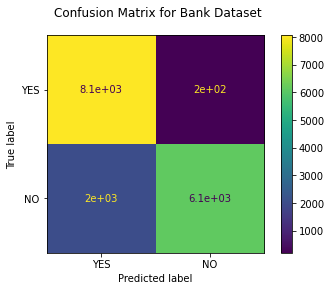

In [624]:
# drawing confusion matrix for the prediction
from sklearn.metrics import plot_confusion_matrix
fig2=plot_confusion_matrix(cl, X_test, y_test,display_labels=["YES","NO"])
fig2.figure_.suptitle("Confusion Matrix for Bank Dataset")
plt.show()